## Import libraries

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Functions

In [2]:
def display_image(img):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap="gray")

## Extract and transform image

In [3]:
image = cv.imread("../data/input/lateral_cube.png")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
# Convert the image to grayscale and blur it slightly
# Blurring the image helps remove some of the high frequency edges in the image and allow a more clean segmentation
gray_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
gray_image = cv.GaussianBlur(gray_image, (7, 7), 0)

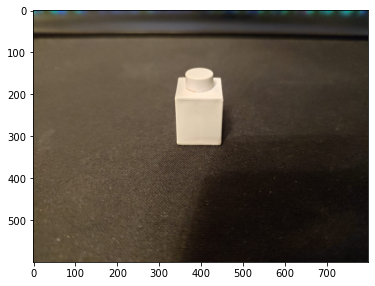

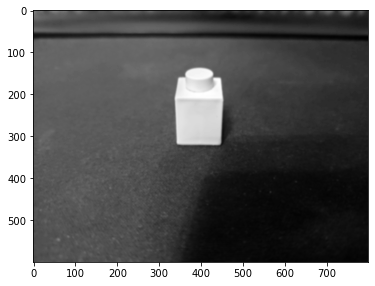

In [4]:
display_image(image)
display_image(gray_image)

## Threshold types

###
***
$\mathbf{\text{Binary Threshold Function}}$<br>
***
$$
dst(x,y) = \left\{
     \begin{array}{ll}
          maxval & if src(x,y) > thresh \\
          0 & otherwise
     \end{array}
     \right.
$$

In [5]:
ret, thresh_binary = cv.threshold(gray_image, 127, 255, cv.THRESH_BINARY)
print(ret)

127.0


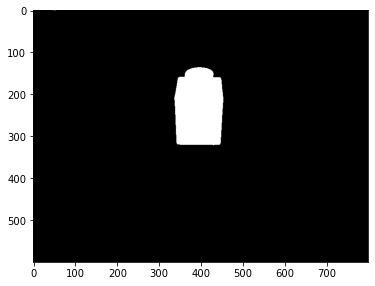

In [6]:
display_image(thresh_binary)

###
***
$\mathbf{\text{Binary Inv Threshold Function}}$<br>
***
$$
dst(x,y) = \left\{
     \begin{array}{ll}
          0 & if src(x,y) > thresh \\
          maxval & otherwise
     \end{array}
     \right.
$$

In [7]:
ret, thresh_binary_inv = cv.threshold(gray_image, 127, 255, cv.THRESH_BINARY_INV)
print(ret)

127.0


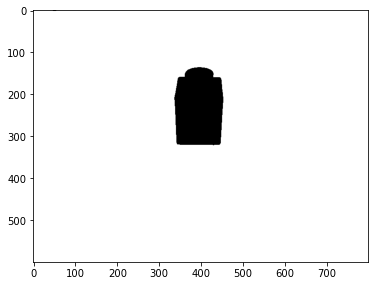

In [8]:
display_image(thresh_binary_inv)

### Threshold truncation

In [9]:
ret, thresh_trunc = cv.threshold(gray_image, 127, 255, cv.THRESH_TRUNC)
print(ret)

127.0


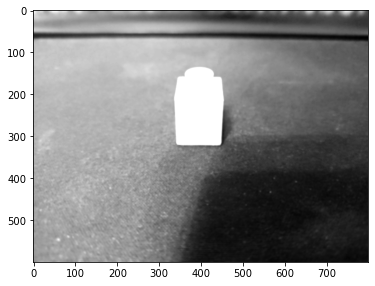

In [10]:
display_image(thresh_trunc)

### Threshold to zero

In [11]:
ret, thresh_to_zero = cv.threshold(gray_image, 127, 255, cv.THRESH_TOZERO)
print(ret)

127.0


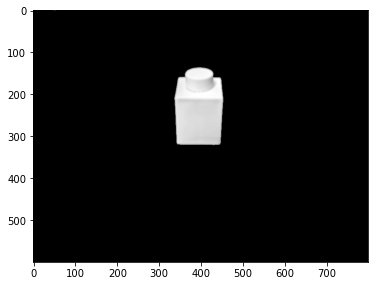

In [12]:
display_image(thresh_to_zero)

### Threshold to zero (Inverse)

In [13]:
ret, thresh_to_zero_inv = cv.threshold(gray_image, 127, 255, cv.THRESH_TOZERO_INV)
print(ret)

127.0


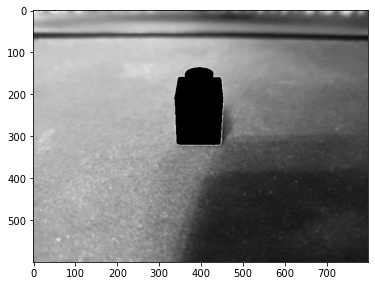

In [14]:
display_image(thresh_to_zero_inv)

### Threshold OTSU

In [15]:
ret, thresh_OTSU = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
print(ret)

66.0


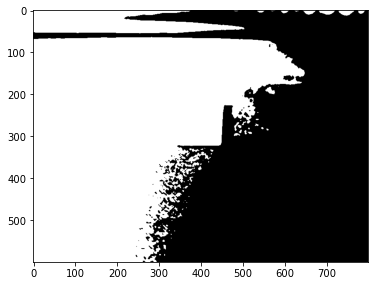

In [16]:
display_image(thresh_OTSU)

### Threshold triangle

In [17]:
ret, thresh_triangle = cv.threshold(gray_image, 127, 255, cv.THRESH_TRIANGLE)
print(ret)

26.0


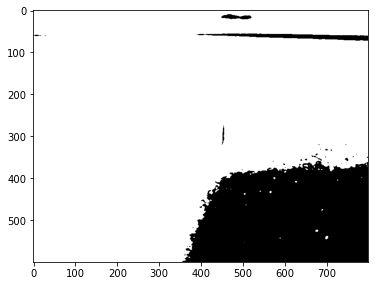

In [18]:
display_image(thresh_triangle)

###
***
$\mathbf{\text{Adaptive Threshold}}$<br>
***
$$T = mean(I_{L}) - C$$

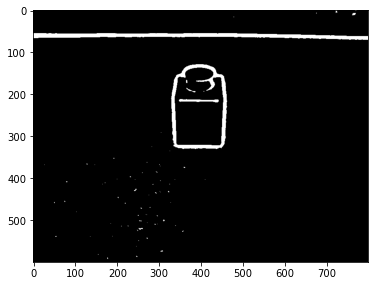

In [28]:
arithmetic_adaptive_thresh = cv.adaptiveThreshold(gray_image, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 21, 10)
display_image(arithmetic_adaptive_thresh)

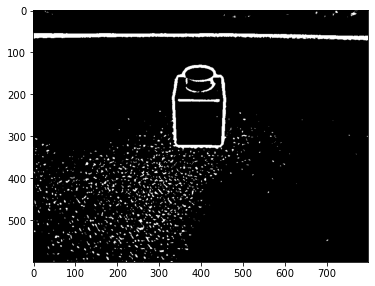

In [29]:
gaussian_adaptive_thresh = cv.adaptiveThreshold(gray_image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 21, 4)
display_image(gaussian_adaptive_thresh)

## Mask images

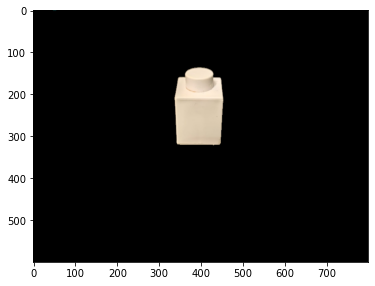

In [21]:
masked = cv.bitwise_and(image, image, mask=thresh_binary)
display_image(masked)